In [8]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from ipynb.fs.full.utils import *


In [4]:
Mean_FPPs_Activity = mean_FPPs_movie_data()

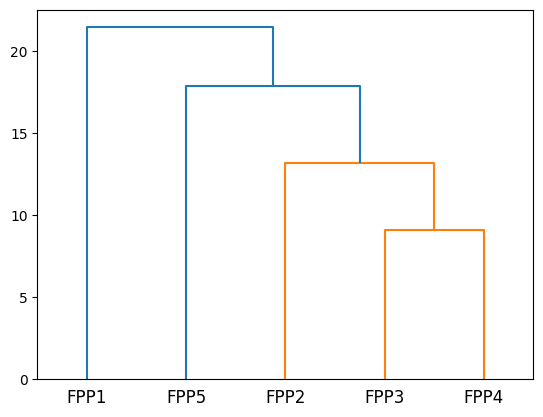

In [24]:

linkage_data = linkage(Mean_FPPs_Activity, method='ward', metric='euclidean')
labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
dendrogram(linkage_data, labels=labels)

plt.show()

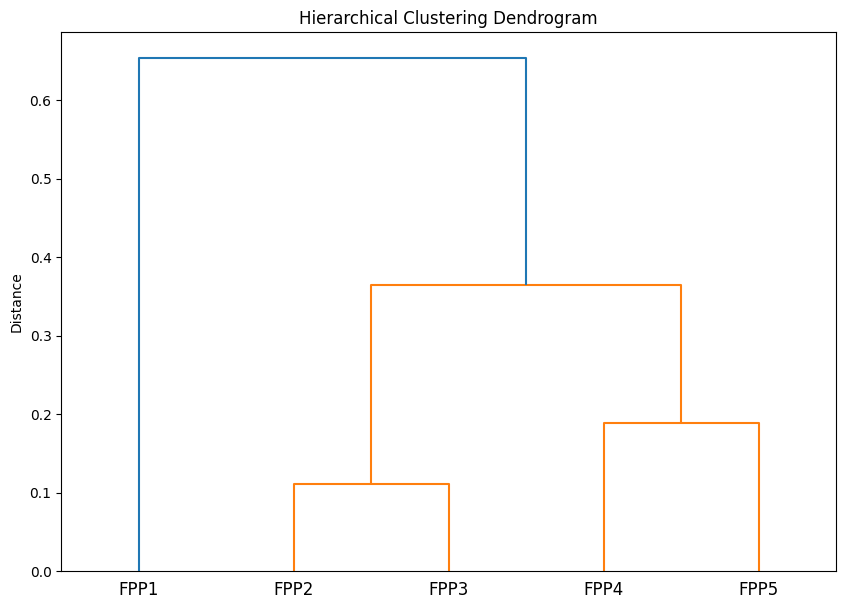

In [23]:
correlation_matrix = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        correlation_matrix[i, j], _ = pearsonr(Mean_FPPs_Activity[i], Mean_FPPs_Activity[j])

distance_matrix = 1 - correlation_matrix
condensed_distance_matrix = squareform(distance_matrix, checks=False)
linkage_matrix = linkage(condensed_distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
dendrogram(linkage_matrix, labels=labels)
plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('FPP')
plt.ylabel('Distance')
plt.show()